In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
%matplotlib inline


In [2]:
df_train= pd.read_csv('data/train.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
y = df_train.SalePrice

In [14]:
feature_engineering2(df_train)

In [15]:
feature_engineering2(df_test)

In [16]:
choosen_cols = choose_cols(df_train)

In [17]:
choosen_cols = choose_cols(df_test)

In [18]:
X = df_train[choosen_cols]

In [19]:
X_test = df_test[choosen_cols]

In [20]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass           1459 non-null int64
LotFrontage          1232 non-null float64
LotArea              1459 non-null int64
OverallQual          1459 non-null int64
OverallCond          1459 non-null int64
YearBuilt            1459 non-null int64
YearRemodAdd         1459 non-null int64
MasVnrArea           1444 non-null float64
BsmtFinSF1           1458 non-null float64
BsmtFinSF2           1458 non-null float64
BsmtUnfSF            1458 non-null float64
TotalBsmtSF          1458 non-null float64
1stFlrSF             1459 non-null int64
2ndFlrSF             1459 non-null int64
LowQualFinSF         1459 non-null int64
GrLivArea            1459 non-null int64
BsmtFullBath         1457 non-null float64
BsmtHalfBath         1457 non-null float64
FullBath             1459 non-null int64
HalfBath             1459 non-null int64
BedroomAbvGr         1459 non-null int64
KitchenAbvGr    

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass           1460 non-null int64
LotFrontage          1201 non-null float64
LotArea              1460 non-null int64
OverallQual          1460 non-null int64
OverallCond          1460 non-null int64
YearBuilt            1460 non-null int64
YearRemodAdd         1460 non-null int64
MasVnrArea           1452 non-null float64
BsmtFinSF1           1460 non-null int64
BsmtFinSF2           1460 non-null int64
BsmtUnfSF            1460 non-null int64
TotalBsmtSF          1460 non-null int64
1stFlrSF             1460 non-null int64
2ndFlrSF             1460 non-null int64
LowQualFinSF         1460 non-null int64
GrLivArea            1460 non-null int64
BsmtFullBath         1460 non-null int64
BsmtHalfBath         1460 non-null int64
FullBath             1460 non-null int64
HalfBath             1460 non-null int64
BedroomAbvGr         1460 non-null int64
KitchenAbvGr         1460 no

In [22]:
heal_cols(X,choosen_cols)

d:\users\tomasz.wolak\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [24]:
xgb_model = XGBRegressor(n_estimators=1000, n_jobs=-1, learning_rate=0.05)

In [25]:
train_X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_cat,GarageFinish_cat,GarageQual_cat,GarageCond_cat,PavedDrive_cat,PoolQC_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
541,60,70.0,11000,8,5,2000,2000,72.0,0,0,...,2,2,0,0,0,-1,-1,-1,0,0
32,20,85.0,11049,8,5,2007,2007,0.0,0,0,...,0,0,0,0,0,-1,-1,-1,0,0
611,80,70.0,10395,6,6,1978,1978,233.0,605,0,...,0,1,0,0,0,-1,0,0,0,0
819,120,44.0,6371,7,5,2009,2010,128.0,733,0,...,0,0,0,0,0,-1,-1,-1,1,2
1001,30,60.0,5400,5,6,1920,1950,0.0,0,0,...,1,1,1,0,1,-1,-1,-1,0,1
1388,20,42.0,14892,9,5,2006,2007,160.0,1320,0,...,0,2,0,0,0,-1,-1,-1,0,0
207,20,70.0,12493,4,5,1960,1960,0.0,419,306,...,0,0,0,0,0,-1,1,-1,0,0
602,60,80.0,10041,8,5,1992,1992,0.0,789,0,...,0,2,0,0,0,-1,-1,-1,0,1
559,120,70.0,3196,7,5,2003,2004,18.0,0,0,...,0,2,0,0,0,-1,-1,-1,0,0
184,50,92.0,7438,5,8,1908,1991,0.0,0,0,...,0,1,0,0,0,-1,0,-1,0,0


In [26]:
xgb_model.fit(train_X, train_y,verbose=False, eval_set=[(test_X, test_y)], early_stopping_rounds=5)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
predictions= xgb_model.predict(test_X)
print("Mean absolute error is \n %d" %(mean_absolute_error(test_y,predictions)))

Mean absolute error is 
 17743


In [28]:
predictions= xgb_model.predict(test_X)
print("Mean absolute error is \n %f" %(rmsle(test_y, predictions)))

NameError: name 'rmsle' is not defined

In [34]:
test_pred = xgb_model.predict(X_test)
sol = pd.DataFrame({'Id':df_test.Id, 'SalePrice':test_pred})
sol.to_csv('output/new_XGboost_model.csv', index=False)

In [35]:
df_all = pd.concat([df_train, df_test], sort=False)

In [36]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 124 entries, Id to SaleCondition_cat
dtypes: float64(12), int64(69), object(43)
memory usage: 2.8+ MB


In [37]:
cols_with_missing = [col for col in df_all.columns
                     if df_all[col].isnull().any()]

In [38]:
df_all[cols_with_missing].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 35 columns):
MSZoning        2915 non-null object
LotFrontage     2433 non-null float64
Alley           198 non-null object
Utilities       2917 non-null object
Exterior1st     2918 non-null object
Exterior2nd     2918 non-null object
MasVnrType      2895 non-null object
MasVnrArea      2896 non-null float64
BsmtQual        2838 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
Electrical      2918 non-null object
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
KitchenQual     2918 non-null object
Functional      2917 non-null object
FireplaceQu     1499 non-null object
GarageType      2762 non-null objec

In [8]:
def feature_engineering2(data):
    non_numeric = data.select_dtypes(include=object).columns.tolist()
    categorize_cols(data, non_numeric)
    return 

In [9]:
def heal_cols(data,cols):
    for col in cols:
        data[col].fillna(value=int(data[col].mean()), inplace=True)
    

In [10]:
def feature_engineering(data):
    data['Neighborhood_cat'] = pd.factorize(data.Neighborhood)[0]
    data['LotShape_cat'] = pd.factorize(data.LotShape)[0]
    data['BldgType_cat'] = pd.factorize(data.BldgType)[0]
    data['HouseStyle_cat'] = pd.factorize(data.HouseStyle)[0]
    data['MSZoning_cat'] = pd.factorize(data.MSZoning)[0]
    

In [11]:
def choose_cols(data):
    black_list = ['Id', 'SalePrice']
    choosen_cols = data.select_dtypes(include=np.number).columns.tolist()
    for col in choosen_cols:
        if col in black_list:
            choosen_cols.remove(col)
    return choosen_cols

In [12]:
def categorize_cols(data, columns):
    for col in columns:
        data[col+"_cat"] = pd.factorize(data[col])[0]
    return

In [13]:
sub_train = pd.read_csv("data/train.csv")

In [ ]:
feature_engineering2(sub_train)
choosen_cols = choose_cols(sub_train)
print(choosen_cols)
print(len(choosen_cols))
heal_cols(sub_train, choosen_cols)

In [39]:
sub_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [29]:
def mae(model, trX, valX, trY, valY):
    model.fit(trX,trY)
    #print(max(model.feature_importances_))
    predictionTest = model.predict(valX)
    predictionTrain = model.predict(trX)
    return mean_absolute_error(valY, predictionTest), mean_absolute_error(trY,predictionTrain)

In [30]:
def mse(model, trX, valX, trY, valY):
    model.fit(trX,trY)
    predictionTest = model.predict(valX)
    predictionTrain = model.predict(trX)
    return rmsle(valY, predictionTest), rmsle(trY,predictionTrain)
    

In [31]:
def rmsle(y_test, y_pred) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [40]:
X = sub_train[choosen_cols]

KeyError: "['MSZoning_cat' 'Street_cat' 'Alley_cat' 'LotShape_cat' 'LandContour_cat'\n 'Utilities_cat' 'LotConfig_cat' 'LandSlope_cat' 'Neighborhood_cat'\n 'Condition1_cat' 'Condition2_cat' 'BldgType_cat' 'HouseStyle_cat'\n 'RoofStyle_cat' 'RoofMatl_cat' 'Exterior1st_cat' 'Exterior2nd_cat'\n 'MasVnrType_cat' 'ExterQual_cat' 'ExterCond_cat' 'Foundation_cat'\n 'BsmtQual_cat' 'BsmtCond_cat' 'BsmtExposure_cat' 'BsmtFinType1_cat'\n 'BsmtFinType2_cat' 'Heating_cat' 'HeatingQC_cat' 'CentralAir_cat'\n 'Electrical_cat' 'KitchenQual_cat' 'Functional_cat' 'FireplaceQu_cat'\n 'GarageType_cat' 'GarageFinish_cat' 'GarageQual_cat' 'GarageCond_cat'\n 'PavedDrive_cat' 'PoolQC_cat' 'Fence_cat' 'MiscFeature_cat'\n 'SaleType_cat' 'SaleCondition_cat'] not in index"

In [41]:
y = sub_train['SalePrice']

In [58]:
def test_f(max_leaf_nodes):
    test_model = XGBRegressor(n_estimators=max_leaf_nodes)
    test_model.fit(X_train, y_train)
    prediction = test_model.predict(X_test)
    prediction2 = test_model.predict(X_train)
    print('estimator %d' %(max_leaf_nodes))
    print('test score %f' %(rmsle(y_test, prediction)))
    print('train score %f' %(rmsle(y_train, prediction2)))
    return rmsle(y_test, prediction), rmsle(y_train, prediction2)


In [48]:
 X_train, X_%test_split(X, y, test_size=0.33, random_state=42)

estimator 10
test score 0.448435
train score 0.439000
test result is 0.448435
estimator 20
test score 0.201325
train score 0.179695
test result is 0.201325
estimator 30
test score 0.160903
train score 0.128076
test result is 0.160903
estimator 40
test score 0.150874
train score 0.112763
test result is 0.150874
estimator 50
test score 0.146420
train score 0.105332
test result is 0.146420
estimator 60
test score 0.143487
train score 0.098378
test result is 0.143487
estimator 70
test score 0.141409
train score 0.093777
test result is 0.141409
estimator 80
test score 0.140720
train score 0.090670
test result is 0.140720
estimator 90
test score 0.140511
train score 0.087497
test result is 0.140511
estimator 100
test score 0.140108
train score 0.084232
test result is 0.140108
estimator 110
test score 0.140594
train score 0.081850
test result is 0.140594
estimator 120
test score 0.140304
train score 0.079758
test result is 0.140304
estimator 130
test score 0.140030
train score 0.077305
test r

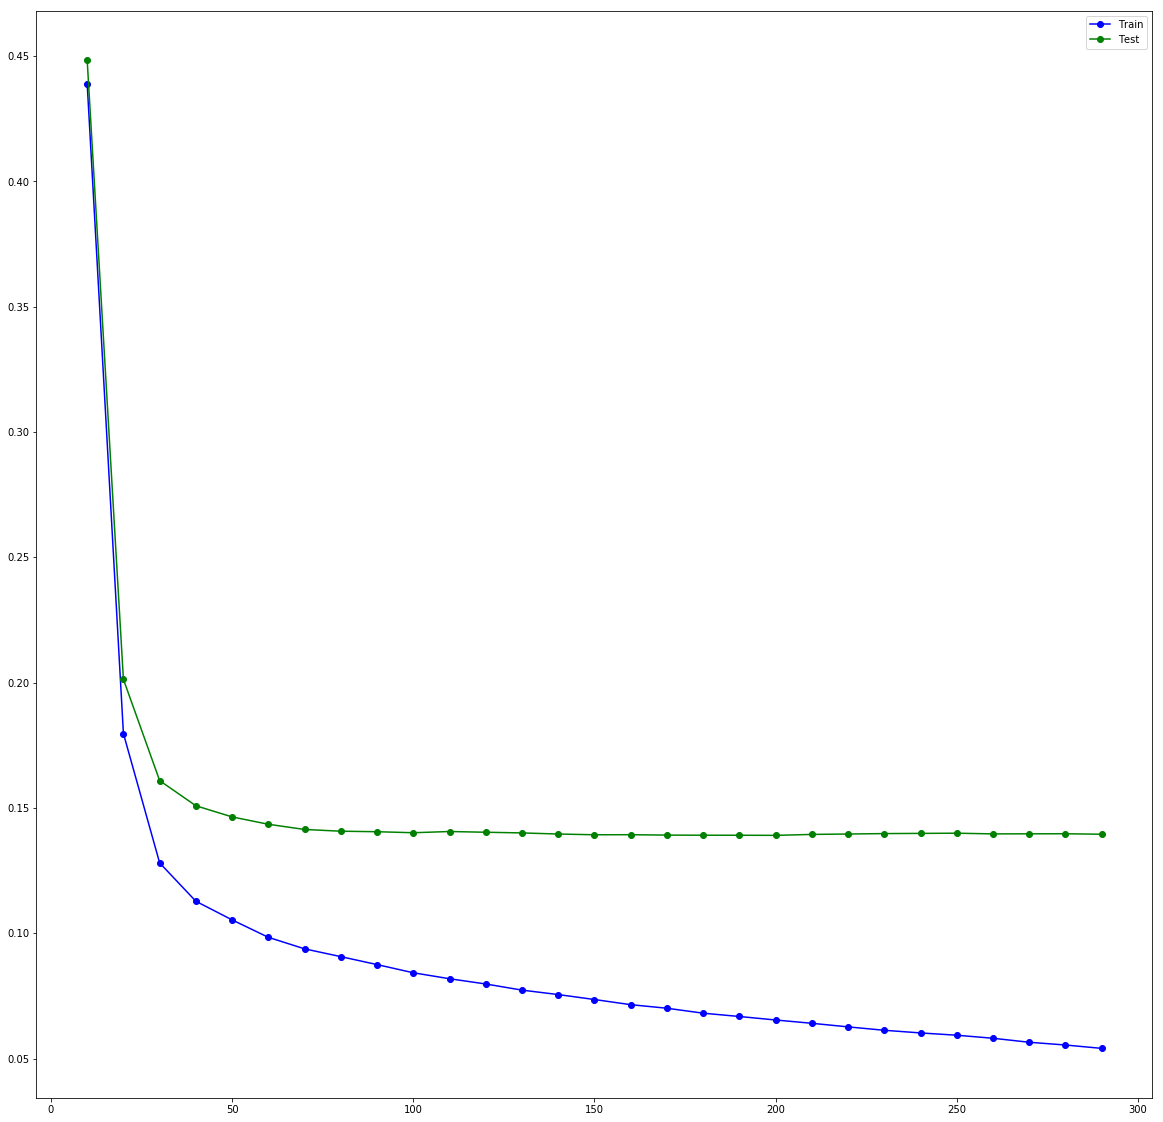

0.1390605990426976
best max_leaf is 200


In [61]:
import math

train_result = list()
test_result = list()
leafs = list()
min_test = math.inf
best_leaf = 5007
for max_leaf in range(10,300,10):
   
    test, train = test_f(max_leaf)
   # test , train = test(model,X_train, X_test, y_train, y_test)
    print('test result is %f' %(test))
    train_result.append(train)
    test_result.append(test)
    min_test = min(min_test, test)
    if min_test == test:
        best_leaf = max_leaf
    leafs.append(max_leaf)
plt.figure(figsize=(20,20))
plt.plot(leafs, train_result, 'bo-', label='Train')
plt.plot(leafs, test_result, 'go-', label='Test')
plt.legend(loc='best')
plt.show()
print(min_test)
print('best max_leaf is %d'%(best_leaf))

In [ ]:
important_cols = list()

In [43]:
important_cols

NameError: name 'important_cols' is not defined

In [44]:
df1 = pd.DataFrame({'col1':['2','2','5','adf'],'col2':[2,4,5,6]})
df2 = pd.DataFrame({'col2':[5,3,6,2,1,563,2]})
df3 = pd.concat([df1, df2], sort=False)
df3
cond = df3.col1.notna()
get_df1 = df3[cond]
get_df1

,col1,col2
0,2,2
1,2,4
2,5,5
3,adf,6


In [45]:
def make_prediction( model, data_all):
    feature_engineering2(data_all)
  #  choosen_cols = important_cols
    choosen_cols = choose_cols(data_all)
    heal_cols(data_all, choosen_cols)
    print(choosen_cols)
  #  heal_cols(test_data, choosen_cols)
   # heal_cols(train_data, choosen_cols)
    test_data = data_all[data_all.SalePrice.isnull()]
    train_data = data_all[data_all.SalePrice.notna()]
    train_X, val_X, train_y, val_y = train_test_split(train_data[choosen_cols], train_data['SalePrice'], test_size=0.25)
    test_X = test_data[choosen_cols]
  #  train_X = train_data[choosen_cols]
  #  train_y = train_data['SalePrice']
    model.fit(train_X, train_y, verbose=True, eval_set=[(val_X, val_y)], early_stopping_rounds=5)
   
 #   for i in range(0,len(model.feature_importances_)):
  #      print('feature name %s \t\t feature importance %d'%(choosen_cols[i], np.round(model.feature_importances_[i],3)))
    prediction = model.predict(test_X)
    solution = pd.DataFrame({'Id':test_data.Id, 'SalePrice':prediction})
    solution.to_csv('output/solution_more_cols_cat_to_all_object_numeric_XGBoost.csv', index=False)
    return

In [46]:
model = XGBRegressor(n_estimators = 500, n_jobs=-1, learning_rate=0.05)
important_cols = make_prediction(model, df_all)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_cat', 'Street_cat', 'Alley_cat', 'LotShape_cat', 'LandContour_cat', 'Utilities_cat', 'LotConfig_cat', 'LandSlope_cat', 'Neighborhood_cat', 'Condition1_cat', 'Condition2_cat', 'BldgType_cat', 'HouseStyle_cat', 'RoofStyle_cat', 'RoofMatl_cat', 'Exterior1st_cat', 'Exterior2nd_cat', 'MasVnrType_cat', 'ExterQual_cat', 'ExterCond_cat', 'Foundation_cat', 'BsmtQual_cat', 'BsmtCond_cat', 'BsmtExposure_cat', 'BsmtFinType1_cat', 'BsmtFinType2_cat', 'Heating_cat', 'HeatingQC_cat', 'CentralAir_cat